# Classification of handwritten digits using MLN

# MNIST Dataset

<img src="https://upload.wikimedia.org/wikipedia/commons/2/27/MnistExamples.png" title="MNIST dataset" align="center"/>



# Problem
Classify handwritten digits from 0 - 9. <br>
Each image is 28x28 pixels

<img src="https://corochann.com/wp-content/uploads/2017/02/mnist_plot.png" title="" align="center"/>


# Understanding the data

In [0]:
from keras.utils.np_utils import to_categorical

Using TensorFlow backend.


In [0]:
# MNIST data is present in the keras library. You may load it from there
from keras.datasets import mnist
def load_data():
    """
    Inputs:
        None
    Outputs:
        train_samples, train_labels, test_samples, test_labels: numpy arrays
    
    Load the train/test of mnist data into these variables
    """
    # YOUR CODE HERE
    (train_samples, train_labels), (test_samples, test_labels) = mnist.load_data()
    return train_samples, train_labels, test_samples, test_labels 

train_samples, train_labels, test_samples, test_labels = load_data()

In [0]:
"""Test cases"""
assert train_samples.shape == (60000, 28, 28)
assert test_labels.shape == (10000,)
print('Test passed', '\U0001F44D')


Test passed 👍


### Shape of Data


In [0]:
print(train_samples.shape)
print(train_labels.shape)
print(test_samples.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Range of Values

In [0]:
import numpy as np
np.amax(train_samples) # Max value

255

In [0]:
np.amin(train_samples) # Min Value

0

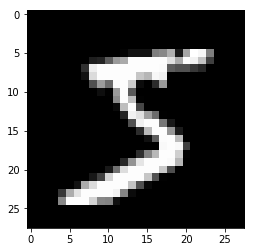

Label of image is 5


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

pixels = train_samples[0] # Shape (28, 28)
plt.imshow(pixels, cmap='gray')
plt.show()
print('Label of image is', train_labels[0])

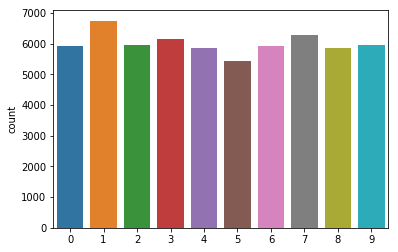

In [0]:
import seaborn as sns
sns.countplot(train_labels)

##We have similar counts for the 10 digits.

# Data Preparation

### Normalize inputs to (0, 1)

In [0]:
def convert_dtype(x):
    """
    Inputs:
        x: numpy array
    Outputs:
        x_float: numpy array, dtype of elements changed to 'float32'
    """
    # YOUR CODE HERE
    x_float = x.astype('float32')
    return x_float

train_samples = convert_dtype(train_samples)
test_samples = convert_dtype(test_samples)

In [0]:
"""Test cases"""
assert str(train_samples.dtype) == 'float32'
print('Test passed', '\U0001F44D')


Test passed 👍


In [0]:
def normalize(x):
    """
    Inputs:
        x: numpy array
    Outputs:
        x_n: numpy array, elements normalized to be between (0, 1)
    """    
    # YOUR CODE HERE
    x_n = x/np.amax(x)
    return x_n
    
train_samples = normalize(train_samples)
test_samples = normalize(test_samples) 


In [0]:
"""Test cases"""
assert np.isclose(np.amax(train_samples), 1)
print('Test passed', '\U0001F44D')


Test passed 👍


In [0]:
train_samples.shape

(60000, 28, 28)

In [0]:
def reshape(x):
    """
    We need to reshape our train_data to be of shape (samples, height, width, channels) pass to Conv2D layer of keras
    Inputs:
        x: numpy array of shape(samples, height, width)
    Outputs:
        x_r: numpy array of shape(samples, height, width, 1)
    """
    # YOUR CODE HERE
    x_r = x.reshape(x.shape[0],x.shape[1],x.shape[2],1)
    return x_r

train_samples = reshape(train_samples)
test_samples = reshape(test_samples)

In [0]:
train_samples.shape

(60000, 28, 28, 1)

In [0]:
train_labels.shape

(60000,)

### Convert outputs to 1-hot vectors
\begin{equation*}
Eg: 5 \rightarrow [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]
\end{equation*}

In [0]:
def oneHot(y, Ny):
    """
    Inputs:
        y: numpy array if shape (samples, ) with class labels
        Ny: number of classes
    Outputs:
        y_oh: numpy array of shape (samples, Ny) of one hot vectors
    """
    # YOUR CODE HERE
    y_oh = to_categorical(y,Ny)
    return y_oh

# example
train_labels = oneHot(train_labels, 10)
test_labels = oneHot(test_labels, 10)

In [0]:
"""Test cases"""
assert train_labels.shape[1] == 10
print('Test passed', '\U0001F44D')


Test passed 👍


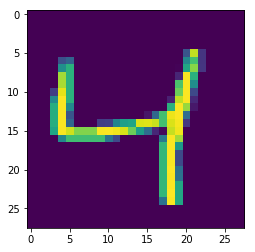

In [0]:
plt.imshow(train_samples[2][:,:,0])

## Create a convolutional neural network model
You may design whatever cnn model you like. But following are hints to get started.<br>
Make the following layers:
1. cnn layer with kernel_size = (5, 5) and 32 kernels
2. cnn layer with kernel_size = (3, 3) and 20 kernels
3. Maxpooling layer of size (2, 2)
4. Flatten layer
5. Dense layer of appropriate size
6. Output layer of appropriate size

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop
def create_model():
    """
    Inputs:
        None
    Outputs:
        model: compiled keras model
    """
    # YOUR CODE HERE
    model = Sequential()
    model.add(Conv2D(32, kernel_size=(3, 3),
                     activation='relu',
                     input_shape=(28,28,1)))

 


    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))



    model.add(MaxPooling2D(pool_size=(2, 2)))


    model.add(Flatten())

    model.add(Dense(128, activation='relu'))
    model.add(Dense(10, activation='softmax'))
    optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
    model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
    return model

model = create_model()

W0623 15:20:17.319638 140159634614144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0623 15:20:17.337101 140159634614144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0623 15:20:17.340524 140159634614144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0623 15:20:17.369517 140159634614144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.

W0623 15:20:17.411961 140159634614144 deprecation_wrapp

In [0]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 9216)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               1179776   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 1,199,882
Trainable params: 1,199,882
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = model.fit(train_samples, train_labels, validation_split = 0.1, epochs=30, batch_size=100)
# Use 10% of samples for validation, validation_split is the relevant parameter


W0623 15:20:17.624813 140159634614144 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0623 15:20:17.711731 140159634614144 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 54000 samples, validate on 6000 samples
Epoch 1/30
54000/54000 [==============================] - 6s 120us/step - loss: 0.1491 - acc: 0.9544 - val_loss: 0.0507 - val_acc: 0.9848
Epoch 2/30
54000/54000 [==============================] - 4s 69us/step - loss: 0.0431 - acc: 0.9868 - val_loss: 0.0373 - val_acc: 0.9883
Epoch 3/30
54000/54000 [==============================] - 4s 69us/step - loss: 0.0270 - acc: 0.9916 - val_loss: 0.0404 - val_acc: 0.9887
Epoch 4/30
54000/54000 [==============================] - 4s 69us/step - loss: 0.0177 - acc: 0.9948 - val_loss: 0.0461 - val_acc: 0.9875
Epoch 5/30
54000/54000 [==============================] - 4s 69us/step - loss: 0.0122 - acc: 0.9963 - val_loss: 0.0362 - val_acc: 0.9898
Epoch 6/30
54000/54000 [==============================] - 4s 69us/step - loss: 0.0082 - acc: 0.9975 - val_loss: 0.0473 - val_acc: 0.9900
Epoch 7/30
54000/54000 [==============================] - 4s 70us/step - loss: 0.0055 - acc: 0.9982 - val_loss: 0.0547 - val_acc

In [0]:
def predict(x):
    """
    Inputs:
        x: input samples
        model: keras model
    Outputs:
        y: predicted labels
    """
    # YOUR CODE HERE
    y = model.predict(x)
    return y

In [0]:

def oneHot_tolabel(y):
    """
    Inputs:
        y: numpy array of shape (samples, Ny)
    Outputs:
        y_b: numpy array of shape (samples,) where one hot encoding is converted back to class labels
    """
    # YOUR CODE HERE
    y_b=[]
    for i in range(y.shape[0]):
      y_b.append(np.argmax(y[i]))
    y_b = np.array(y_b)
    return y_b
    

In [0]:
from sklearn.metrics import confusion_matrix
def create_confusion_matrix(true_labels, predicted_labels):
    """
    Inputs:
        true_labels: numpy array of shape (samples, ) with true_labels
        test_labels: numpy array of shape(samples, ) with test_labels
    Outputs:
        cm: numpy array of shape (Ny, Ny), confusion matrix. Ny -> number of unique classes in y
    """
    # YOUR CODE HERE
    cm = confusion_matrix(true_labels, predicted_labels)
    return cm

In [0]:
predicted_labels_train = predict(train_samples)

In [0]:
oneHot_tolabel(train_labels).shape

(60000,)

In [0]:
cm = create_confusion_matrix(oneHot_tolabel(train_labels), oneHot_tolabel(predicted_labels_train))

In [0]:
print(cm)

[[5919    0    0    0    0    0    1    1    0    2]
 [   0 6738    2    0    0    0    1    1    0    0]
 [   1    1 5955    1    0    0    0    0    0    0]
 [   0    0    1 6128    0    0    0    0    2    0]
 [   0    2    1    0 5831    0    0    1    1    6]
 [   2    0    0    3    0 5408    4    0    4    0]
 [   0    0    0    0    1    1 5916    0    0    0]
 [   0    0    0    1    2    0    0 6260    0    2]
 [   0    0    1    0    0    0    2    0 5848    0]
 [   0    0    0    2    4    2    0    1    2 5938]]


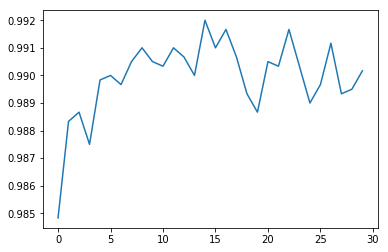

In [0]:
history.history.keys()
import matplotlib.pyplot as plt
plt.plot(range(len(history.history['val_acc'])), history.history['val_acc'])
plt.show()

In [0]:
def accuracy(x_test, y_test, model):
    """
    Inputs:
        x_test: test samples
        y_test : test labels
        model: keras model
    Ouputs:
        acc: float, accuracy of test data on model
    """
    # YOUR CODE HERE
    loss, acc = model.evaluate(x_test, y_test,verbose=0)
    return acc

acc = accuracy(test_samples, test_labels, model)
print('Test accuracy is, ', acc*100, '%')

Test accuracy is,  99.11999999999999 %


### Advanced
1. Tune the hyperparameters to better the performance
2. Find the classes which are getting most confused from confusion matrix. Take out those samples. Plot them and see why they are getting confused.

In [0]:
# Display some error results 

# Errors are difference between predicted labels and true labels
import pandas as pd
Y_true = oneHot_tolabel(train_labels)
Y_pred_classes = oneHot_tolabel(predicted_labels_train)
wrong_resuls = []
for i in range(Y_true.shape[0]):
  if ((Y_pred_classes[i] - Y_true[i]) != 0):
    wrong_resuls.append((i,Y_pred_classes[i],Y_true[i]))
wrong_resuls = pd.DataFrame(wrong_resuls,columns =['indexs','Y_pred','Y_true'])

In [0]:
wrong_resuls.shape

(59, 3)

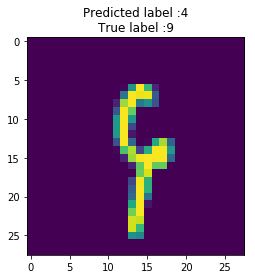

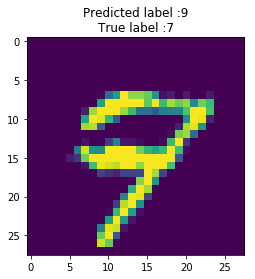

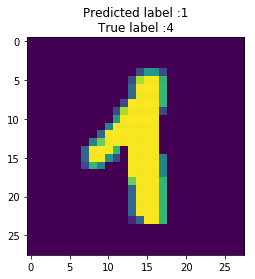

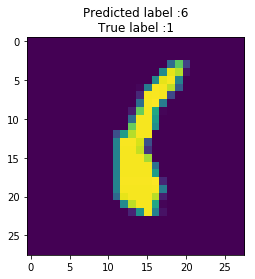

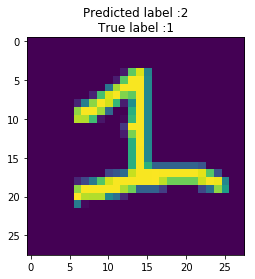

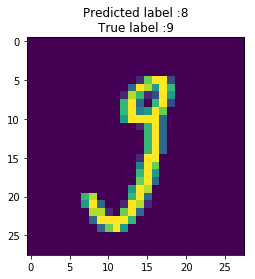

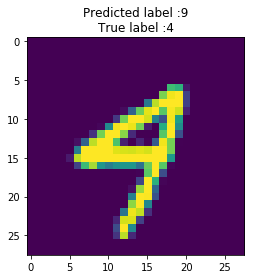

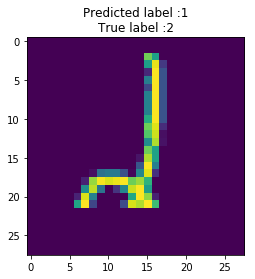

In [0]:
for i in range(0,8):
    plt.imshow(train_samples[wrong_resuls['indexs'][i]][:,:,0])
    plt.title("Predicted label :{}\nTrue label :{}".format(wrong_resuls['Y_pred'][i],wrong_resuls['Y_true'][i]))
    plt.show()

##For those eight case, the model is not giving wrong results. Some of these errors can also be made by humans, many samples are currect predicted but in given data they are wrong as you can see above fig's and also sume wrong predictions by model.